# Import Libraries

In [1]:

import gzip

# data manipulation
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

# models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import log_loss

# plotting
from matplotlib import pyplot as plt
import seaborn as sns

# Importing CSV

In [2]:
from google.colab import files

files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn (1).csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


{'WA_Fn-UseC_-Telco-Customer-Churn (1).csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check

In [3]:
main_df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [4]:
main_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# CHURN RATE

## Data Cleaning

In [5]:
main_df.drop(columns = ['customerID'], inplace = True)

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
main_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
main_df.duplicated().sum()

22

In [9]:
main_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Imputer for Missing String in Total Charges

In [10]:
imputer = SimpleImputer(missing_values = ' ',
                        strategy = 'constant',
                        fill_value = '0')
main_df['TotalCharges'] = imputer.fit_transform(main_df[['TotalCharges']]).astype('float')

In [11]:
cat_col = ['MultipleLines','InternetService',
           'OnlineSecurity','OnlineBackup',
           'DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies',
           'Contract','PaymentMethod',
           'gender','Partner',
           'Dependents','PhoneService',
           'PaperlessBilling','Churn']
num_col = ['tenure','MonthlyCharges','TotalCharges'] 
pass_col = ['SeniorCitizen']

## Preprocessing Pipelines

In [12]:
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', dtype = 'int', sparse=False) )]) 

num_pipe = Pipeline([('normalize', StandardScaler())])

col_tfm = ColumnTransformer(transformers=[('cat', cat_pipe, cat_col),
                                          ('num', num_pipe, num_col)],
                            remainder = 'passthrough')
main_transformed = col_tfm.fit_transform(main_df)

In [13]:
main_transformed

array([[ 0.        ,  1.        ,  0.        , ..., -1.16032292,
        -0.99261052,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.25962894,
        -0.17216471,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.36266036,
        -0.9580659 ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.1686319 ,
        -0.85293201,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.32033821,
        -0.87051315,  1.        ],
       [ 1.        ,  0.        ,  0.        , ...,  1.35896134,
         2.01389665,  0.        ]])

In [14]:
new_cat_col_name = col_tfm.named_transformers_['cat']['encoder'].get_feature_names(cat_col)

In [15]:
main_transformed = pd.DataFrame(main_transformed, columns = np.concatenate([new_cat_col_name, num_col, pass_col]))

In [16]:
drop_col = ['MultipleLines_No','MultipleLines_No phone service',
            'InternetService_No','OnlineSecurity_No',
            'OnlineSecurity_No internet service','OnlineBackup_No',
            'OnlineBackup_No internet service','DeviceProtection_No',
            'DeviceProtection_No internet service','TechSupport_No',
            'TechSupport_No internet service','StreamingTV_No',
            'StreamingTV_No internet service','StreamingMovies_No',
            'StreamingMovies_No internet service','gender_Female',
            'Partner_No','Dependents_No',
            'PhoneService_No','PaperlessBilling_No',
            'Churn_No']
main_transformed.drop(columns = drop_col, inplace = True)            

In [17]:
main_transformed.head()

,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.277445,-1.160323,-0.992611,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.066327,-0.259629,-0.172165,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.236724,-0.362660,-0.958066,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.514251,-0.746535,-0.193672,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.236724,0.197365,-0.938874,0.0


## Data Visulization

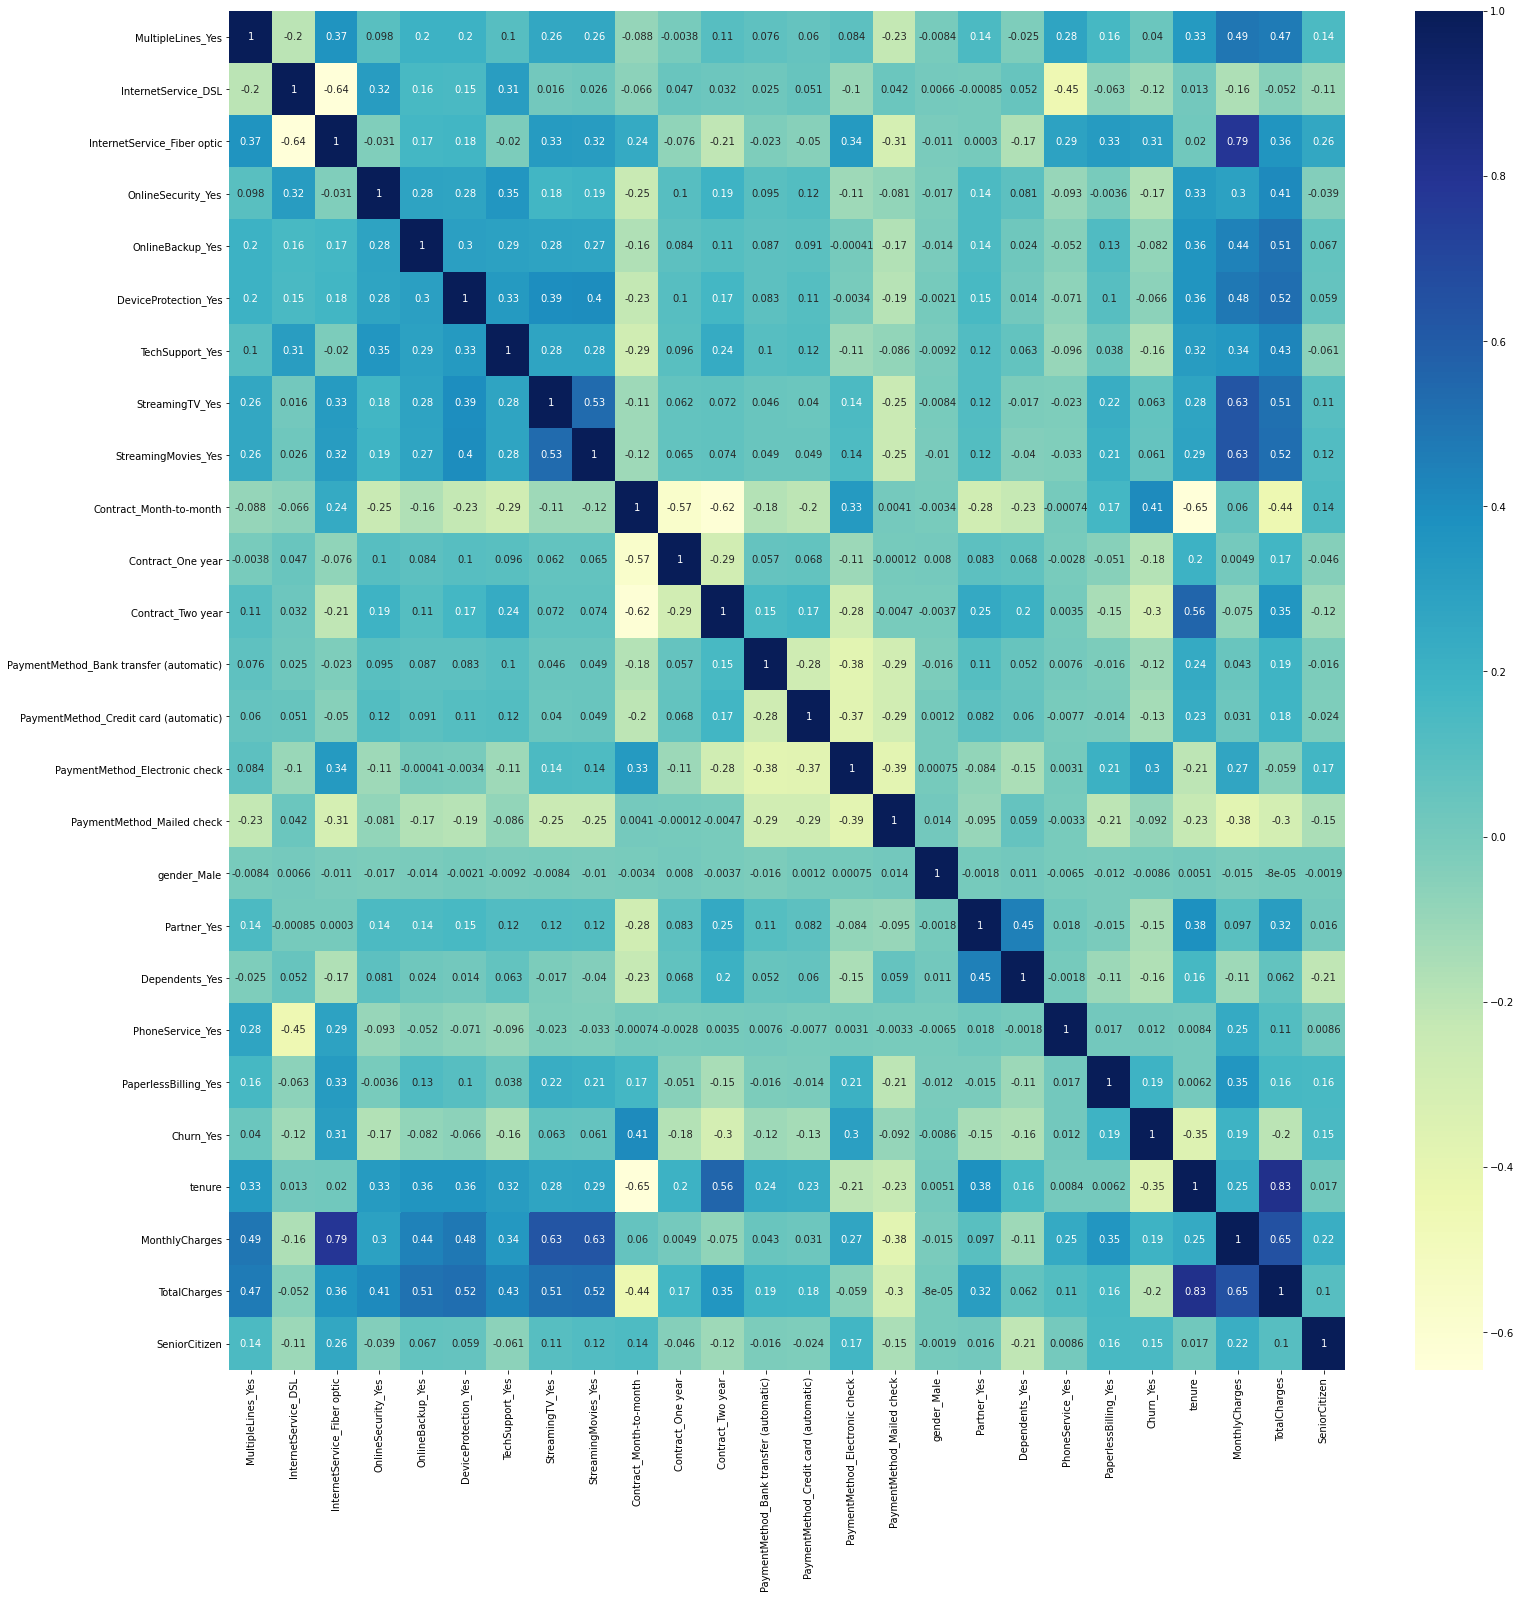

In [18]:
plt.figure(figsize = (25,25))
dataplot = sns.heatmap(main_transformed.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Drop Categorical

In [19]:
main_transformed.drop(columns = ['gender_Male','PhoneService_Yes'], inplace = True) 

💰 Drop these two as there is very little correlation either way between them and the other columns

# Numerical Column EDA

## Tenure, Monthly Charges, Total Charges

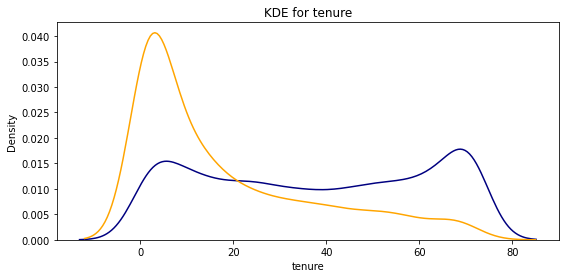

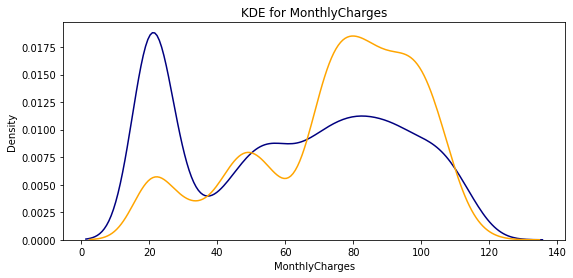

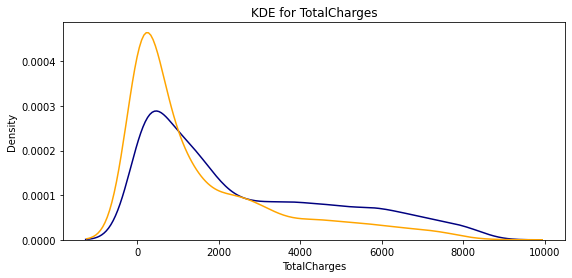

In [20]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(main_df[main_df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(main_df[main_df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')
plt.show()


💰 From the plots above we can conclude that:

1) Recent clients are more likely to churn

2) Clients with higher MonthlyCharges are also more likely to churn

3) Tenure and MonthlyCharges are probably important features


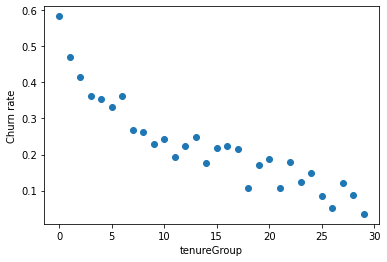

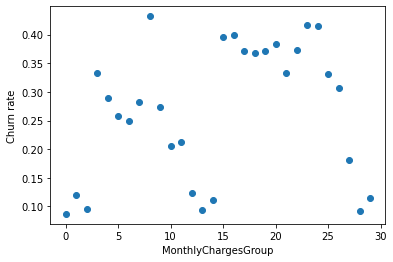

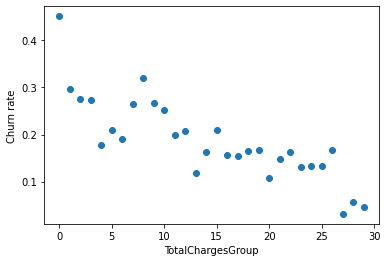

In [21]:
tmp = main_transformed.copy()
bins = 30
for i in num_col :
    tmp[i+'Group'] = pd.cut(main_transformed[i], bins = bins, labels = range(bins), include_lowest=True)
    pltdata = tmp.groupby(i+'Group').mean()[['Churn_Yes']].reset_index()#.plot(kind = 'scatter')
    plt.figure()
    plt.scatter(pltdata[i+'Group'], pltdata['Churn_Yes'])
    plt.xlabel(i+'Group')
    plt.ylabel('Churn rate')

💰  We can see that the longer the tenure, the smaller the churn rate.

## Senior Citizens

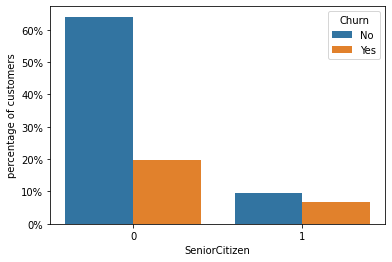

In [22]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = main_df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(main_df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

💰 SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.

## Partners and Dependents

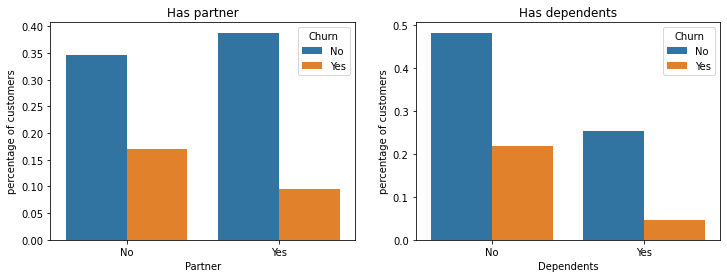

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = main_df.groupby('Partner')["Churn"].value_counts()/len(main_df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = main_df.groupby('Dependents')["Churn"].value_counts()/len(main_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

💰 Customers that dont have partners are MORE LIKELY to churn

💰 Customers without dependents are also MORE LIKELY to churn

## Multiple Lines

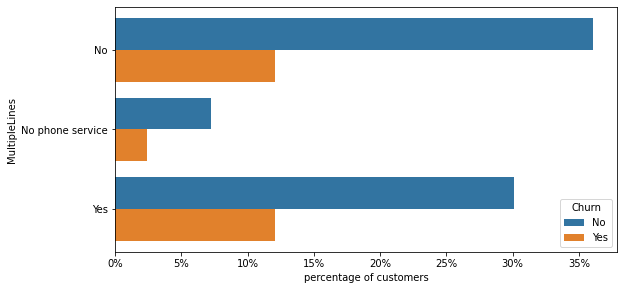

In [24]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

💰 Few customers doesn't have phone service

💰 Customers with multiple lines have a slightly higher churn rate

## Internet Service

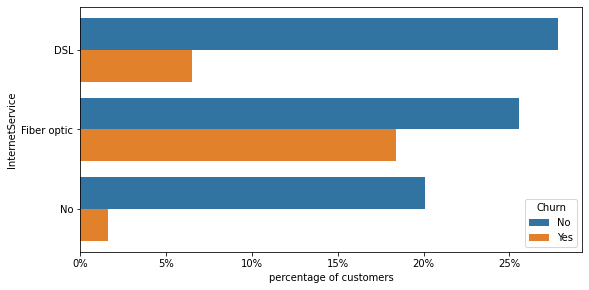

In [25]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

💰 Clients without internet have a very low churn rate

💰 Customers with fiber are more probable to churn than those with DSL connection

## Additional Services

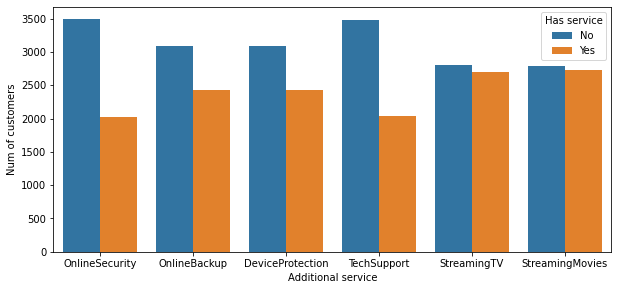

In [26]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(main_df[main_df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

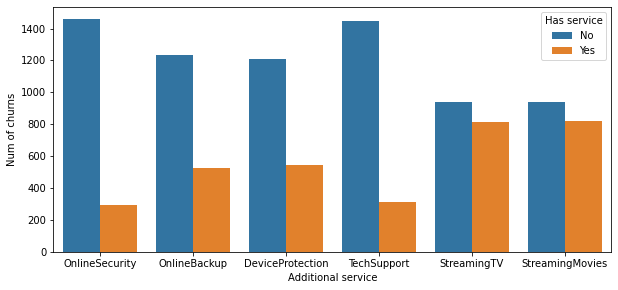

In [27]:
plt.figure(figsize=(10, 4.5))
df1 = main_df[(main_df.InternetService != "No") & (main_df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

💰 First plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

💰 Customers with the first 4 additionals (security to tech support) are more unlikely to churn

💰 Streaming service is not predictive for churn

## Payment Methods

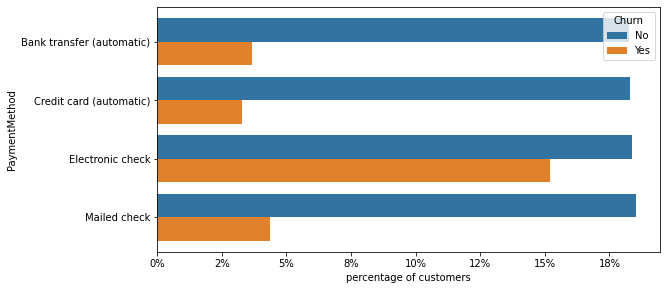

In [28]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

💰 The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate

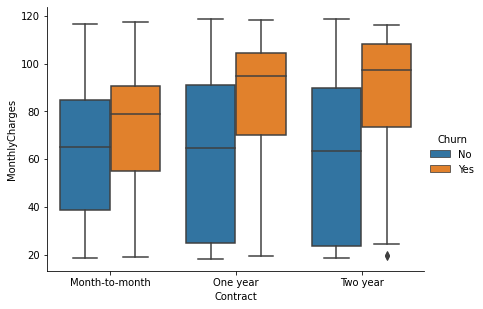

In [29]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=main_df, height=4.2, aspect=1.4)

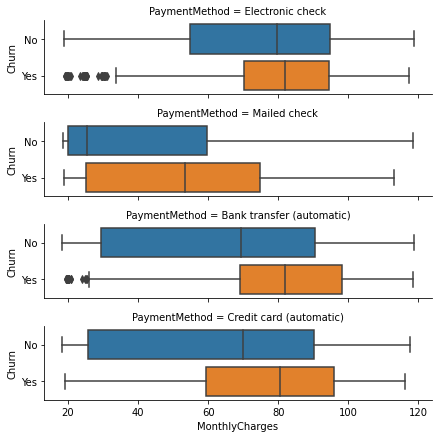

In [30]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=main_df, height=1.5, aspect=4, orient='h')

💰 Longer contracts are more affected by higher monthly charges (for churn rate)

💰  Mailed checks have lower charges

💰  There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check

## Drop Numerical Columns

Column TotalCharges has linear relationship with MonthlyCharges * tenure => We can drop TotalCharges

In [31]:
main_transformed.drop(columns = ["TotalCharges"],inplace = True)
main_transformed

,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,Churn_Yes,tenure,MonthlyCharges,SeniorCitizen
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.277445,-1.160323,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.066327,-0.259629,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.236724,-0.362660,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514251,-0.746535,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.236724,0.197365,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-0.340876,0.665992,0.0
7039,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.613701,1.277533,0.0
7040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,-0.870241,-1.168632,0.0
7041,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.155283,0.320338,1.0


In [32]:
main_transformed

,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,Churn_Yes,tenure,MonthlyCharges,SeniorCitizen
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.277445,-1.160323,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.066327,-0.259629,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.236724,-0.362660,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514251,-0.746535,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.236724,0.197365,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-0.340876,0.665992,0.0
7039,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.613701,1.277533,0.0
7040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,-0.870241,-1.168632,0.0
7041,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.155283,0.320338,1.0


# Labels and Features Seperation

In [33]:
label = main_transformed["Churn_Yes"]

In [34]:
features = main_transformed.drop(columns = ["Churn_Yes"])

# Model 1: XGBoost (Dont cut features)

In [35]:
!pip install xgboost==1.4.0
import xgboost as xgb

     |████████████████████████████████| 166.7MB 61kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [37]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (5634, 22)
Training Labels Shape: (5634,)
Testing Features Shape: (1409, 22)
Testing Labels Shape: (1409,)


In [38]:
XGB = xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, num_class = 2)

In [39]:
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:00:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
y_train_pred = XGB.predict(X_train)
y_train_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [41]:
# Evaluating Model
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

Test Accuracy Score: 0.7764371894960965
Training Accuracy Score: 0.7907348242811502
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      1041
         1.0       0.67      0.28      0.40       368

    accuracy                           0.78      1409
   macro avg       0.73      0.62      0.63      1409
weighted avg       0.76      0.78      0.74      1409



In [ ]:
# optimization_dict = {'max_depth': [2,4,6],
#                      'n_estimators': [50,100,200], 
#                       "colsample_bytree": [0.5,0.9], 
#                       "learning_rate":[0.05,0.3], 
#                       "alpha":[0]}

# model_XGB = GridSearchCV(XGB, optimization_dict, 
#                      scoring='accuracy', verbose=2, n_jobs = 2)

# model_XGB.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  6.9min
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  7.6min finished
/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:27:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(alpha=10, base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.3, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=10,...
                                     scale_pos_weight=None, subsample=1,
                                     tree_method='exact',
                                     use_label_encoder=True,
                                     validate_parameters=1, verbosity=None),
             iid='deprecated', n_jobs=2,
         

In [ ]:
# print(model_XGB.best_params_)

In [42]:
xgb= xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.5, learning_rate = 0.3,
                max_depth = 4, alpha = 0, n_estimators = 50, num_class = 2)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:00:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=2, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [43]:
y_pred = xgb.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [44]:
y_train_pred = xgb.predict(X_train)
y_train_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [45]:
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

Test Accuracy Score: 0.7856635911994322
Training Accuracy Score: 0.8379481718139865
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1041
         1.0       0.61      0.49      0.54       368

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



## Cut Features based on Importance

In [46]:
label = main_transformed["Churn_Yes"]

In [47]:
features.columns

Index(['MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Partner_Yes', 'Dependents_Yes', 'PaperlessBilling_Yes', 'tenure',
       'MonthlyCharges', 'SeniorCitizen'],
      dtype='object')

In [48]:
features = main_transformed.drop(columns = ["DeviceProtection_Yes", "Churn_Yes", 'Partner_Yes', 'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)'])

In [50]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=0)

In [51]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (5634, 18)
Training Labels Shape: (5634,)
Testing Features Shape: (1409, 18)
Testing Labels Shape: (1409,)


In [52]:
XGB = xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, num_class = 2)

In [53]:
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
y_pred

[03:01:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
y_train_pred = XGB.predict(X_train)
y_train_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [55]:
# Evaluating Model
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

Test Accuracy Score: 0.7750177430801988
Training Accuracy Score: 0.7919772807951722
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      1041
         1.0       0.67      0.27      0.39       368

    accuracy                           0.78      1409
   macro avg       0.73      0.61      0.62      1409
weighted avg       0.76      0.78      0.74      1409



In [ ]:
# optimization_dict = {'max_depth': [2,4,6],
#                      'n_estimators': [50,100,200], 
#                       "colsample_bytree": [0.5,0.9], 
#                       "learning_rate":[0.05,0.3], 
#                       "alpha":[0]}

# grid_XGB = GridSearchCV(XGB, optimization_dict, 
#                      scoring='accuracy', verbose=2, n_jobs = 2)

# grid_XGB.fit(X_train,y_train)


In [ ]:
# print(model_XGB.best_params_)

In [56]:
xgb= xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.5, learning_rate = 0.3,
                max_depth = 4, alpha = 0, n_estimators = 50, num_class = 2)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:01:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=2, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [57]:
y_pred = xgb.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [58]:
y_train_pred = xgb.predict(X_train)
y_train_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [59]:
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

Test Accuracy Score: 0.7856635911994322
Training Accuracy Score: 0.8345757898473554
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1041
         1.0       0.61      0.49      0.55       368

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



### Another Attempt at a Gridsearch

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=0)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (5634, 22)
Training Labels Shape: (5634,)
Testing Features Shape: (1409, 22)
Testing Labels Shape: (1409,)


In [ ]:
params = {
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "learning_rate": [0.5, 0.10, 0.15, 0.20, 0.25, 0.30],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

grid_XGB = RandomizedSearchCV(XGB, params, n_iter = 5, cv = 5,
                     scoring='accuracy', verbose=2, n_jobs = 2)

grid_XGB.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[06:52:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    8.4s finished
/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(alpha=10, base_score=0.5,
                                           booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.3, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=5, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=2,
                   

In [ ]:
grid_XGB.best_estimator_

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
grid_XGB.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.5,
 'max_depth': 3,
 'min_child_weight': 1}

In [ ]:
xgb= xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.7, learning_rate = 0.5,
                max_depth = 3, alpha = 0, n_estimators = 50, num_class = 2, min_child_weight = 1, gamma = 0.4)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:54:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=2, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
y_pred = xgb.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
y_train_pred = xgb.predict(X_train)
y_train_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [ ]:
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

Test Accuracy Score: 0.7814052519517388
Training Accuracy Score: 0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1041
         1.0       0.60      0.49      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



# Model 2: LightLGB

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.20, random_state = 0)

In [61]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
y_pred=clf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7821


In [64]:
y_pred_train = clf.predict(X_train)

In [65]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8660


### LIGHTLGM Gridsearch

In [66]:
# params = {'boosting_type': 'gbdt',
#           'max_depth' : -1,
#           'objective': 'binary',
#           'nthread': 3, # Updated from nthread
#           'num_leaves': 64,
#           'learning_rate': 0.05,
#           'max_bin': 512,
#           'subsample_for_bin': 200,
#           'subsample': 1,
#           'subsample_freq': 1,
#           'colsample_bytree': 0.8,
#           'reg_alpha': 5,
#           'reg_lambda': 10,
#           'min_split_gain': 0.5,
#           'min_child_weight': 1,
#           'min_child_samples': 5,
#           'scale_pos_weight': 1,
#           'num_class' : 1,
#           'metric' : 'binary_error'}

# # Create parameters to search
# gridParams = {
#     'learning_rate': [0.005],
#     'n_estimators': [40],
#     'num_leaves': [6,8,12,16],
#     'boosting_type' : ['gbdt'],
#     'objective' : ['binary'],
#     'random_state' : [501], # Updated from 'seed'
#     'colsample_bytree' : [0.65, 0.66],
#     'subsample' : [0.7,0.75],
#     'reg_alpha' : [1,1.2],
#     'reg_lambda' : [1,1.2,1.4],
#     }

# # Create classifier to use. Note that parameters have to be input manually
# # not as a dict!
# mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
#           objective = 'binary',
#           n_jobs = 3, # Updated from 'nthread'
#           silent = True,
#           max_depth = params['max_depth'],
#           max_bin = params['max_bin'],
#           subsample_for_bin = params['subsample_for_bin'],
#           subsample = params['subsample'],
#           subsample_freq = params['subsample_freq'],
#           min_split_gain = params['min_split_gain'],
#           min_child_weight = params['min_child_weight'],
#           min_child_samples = params['min_child_samples'],
#           scale_pos_weight = params['scale_pos_weight'])


In [67]:
# grid = GridSearchCV(mdl, gridParams,
#                     verbose=2,
#                     cv=4,
#                     n_jobs=2)
# # Run the grid
# grid.fit(X_train, y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   14.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   32.0s
[Parallel(n_jobs=2)]: Done 384 out of 384 | elapsed:   34.5s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_bin=512,
                                      max_depth=-1, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_estimators=100, n_jobs=3, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,...
             iid='deprecated', n_jobs=2,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.65, 0.66],
                         'learning_rate': [0.005], 'n_estimators': [40],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
      

In [68]:
# # Print the best parameters found
# print(grid.best_params_)
# print(grid.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.005, 'n_estimators': 40, 'num_leaves': 6, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
0.7335818540712304


In [73]:
clf_grid = lgb.LGBMClassifier(boosting_type = "gbdt", colsample_bytree= 0.65, learning_rate= 0.005, n_estimators= 40, num_leaves= 6, objective= "binary", random_state= 0, reg_alpha= 1, reg_lambda= 1, subsample= 0.7)
clf_grid.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.65,
               importance_type='split', learning_rate=0.005, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=40, n_jobs=-1, num_leaves=6, objective='binary',
               random_state=0, reg_alpha=1, reg_lambda=1, silent=True,
               subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [74]:
y_pred=clf_grid.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7388


In [76]:
y_pred_train = clf_grid.predict(X_train)

In [77]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7336


# Model 3: A bunch of different models.

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


In [86]:
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size = 0.20, random_state = 0)

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()]]
               

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.7338537970191625
RandomForest : 0.7622427253371186
Naive Bayes : 0.7104329311568488
KNeighbours : 0.7700496806245565
SVM : 0.7913413768630234


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network : 0.7764371894960965
LogisticRegression : 0.794889992902768
ExtraTreesClassifier : 0.7473385379701917
AdaBoostClassifier : 0.7913413768630234
GradientBoostingClassifier:  0.7835344215755855
[03:43:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB : 0.7842441447835344


In [90]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(accuracy_score(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:50:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7906316536550745


In [91]:
eclf1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:51:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                              

In [92]:
y_pred = eclf1.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [93]:
y_train_pred = eclf1.predict(X_train)
y_train_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [94]:
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

Test Accuracy Score: 0.7906316536550745
Training Accuracy Score: 0.8525026624068157
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1041
         1.0       0.62      0.50      0.56       368

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# Feature Importance

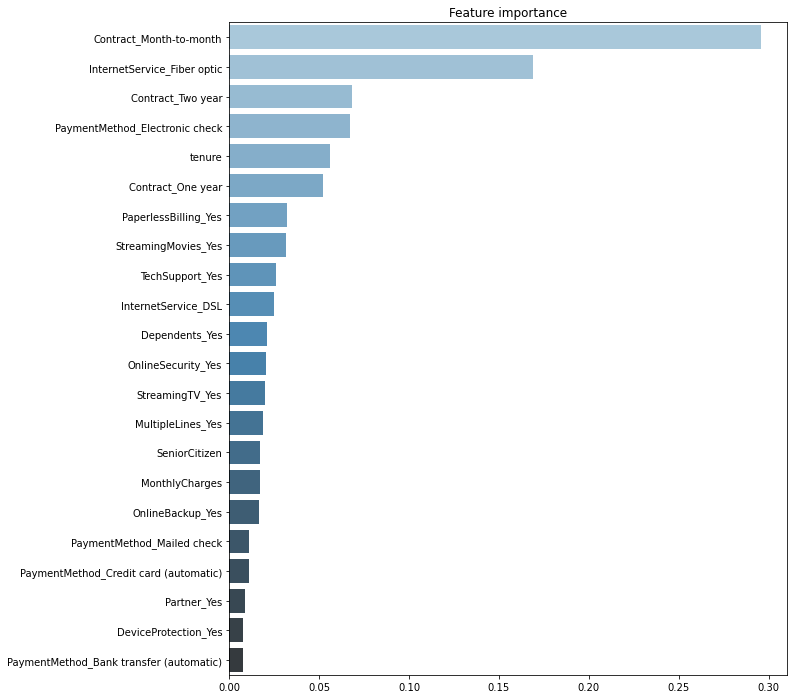

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=0)
# Fit RandomForest Classifier
xgb= xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.5, learning_rate = 0.3,
                max_depth = 4, alpha = 0, n_estimators = 50, num_class = 2)
xgb = xgb.fit(X_train, y_train)

# Plot features importances
imp = pd.Series(data=xgb.feature_importances_, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

# Customer Segmentation

If you want to grow your business, it makes sense to put in the effort to understand the characteristics of your customers for at least two reasons: 
1. To continue to provide this group with what they’re looking for and keep them as customers
2. To target your marketing efforts toward prospects who resemble your best customers.

By targeting your acquisition marketing through insights into your best customers, you attract customers who are likely to respond to the strengths of your business and remain loyal to it. **Instead of targeting all customers at once, you can start segment your customers and use different strategy for each group. With this approach, you will also focus on your potential customers to develop strategies for them.**

But, before you can start to understand your best customers, you first need to identify them. And that’s where a simple database marketing tool called recency, frequency, monetary analysis (or RFM) comes in handy.

In [106]:
main_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [99]:
main_transformed

,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,Churn_Yes,tenure,MonthlyCharges,SeniorCitizen
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.277445,-1.160323,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.066327,-0.259629,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.236724,-0.362660,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514251,-0.746535,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.236724,0.197365,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-0.340876,0.665992,0.0
7039,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.613701,1.277533,0.0
7040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,-0.870241,-1.168632,0.0
7041,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.155283,0.320338,1.0


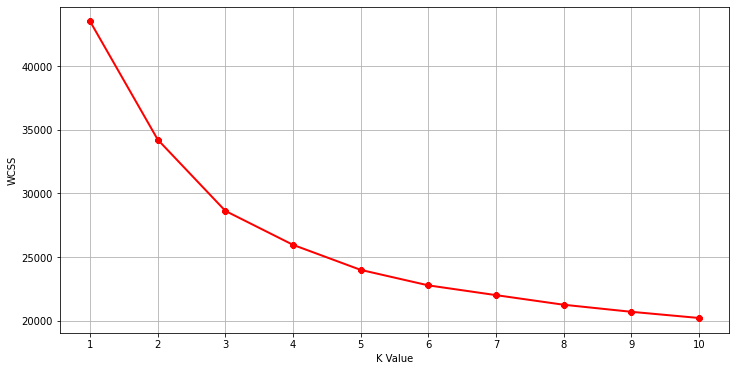

In [98]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(main_transformed.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

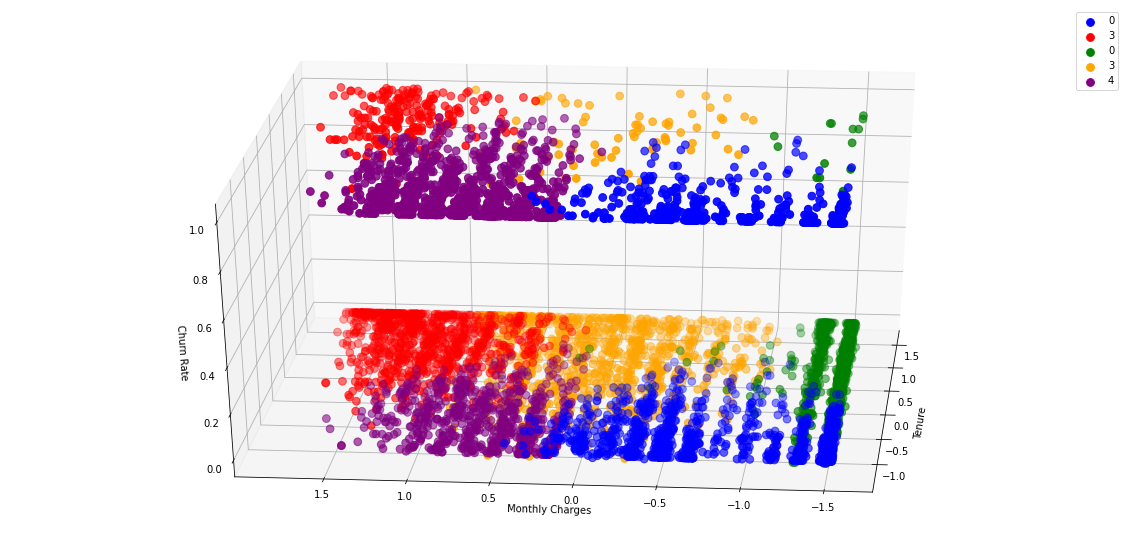

In [110]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(main_transformed.iloc[:,1:])
main_transformed["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(main_transformed.tenure[main_transformed.label == 0], main_transformed["MonthlyCharges"][main_transformed.label == 0], main_transformed["Churn_Yes"][main_transformed.label == 0], c='blue', s=60)
ax.scatter(main_transformed.tenure[main_transformed.label == 1], main_transformed["MonthlyCharges"][main_transformed.label == 1], main_transformed["Churn_Yes"][main_transformed.label == 1], c='red', s=60)
ax.scatter(main_transformed.tenure[main_transformed.label == 2], main_transformed["MonthlyCharges"][main_transformed.label == 2], main_transformed["Churn_Yes"][main_transformed.label == 2], c='green', s=60)
ax.scatter(main_transformed.tenure[main_transformed.label == 3], main_transformed["MonthlyCharges"][main_transformed.label == 3], main_transformed["Churn_Yes"][main_transformed.label == 3], c='orange', s=60)
ax.scatter(main_transformed.tenure[main_transformed.label == 4], main_transformed["MonthlyCharges"][main_transformed.label == 4], main_transformed["Churn_Yes"][main_transformed.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
ax.set_zlabel('Churn Rate')
plt.legend(clusters)
plt.show()

## Churners

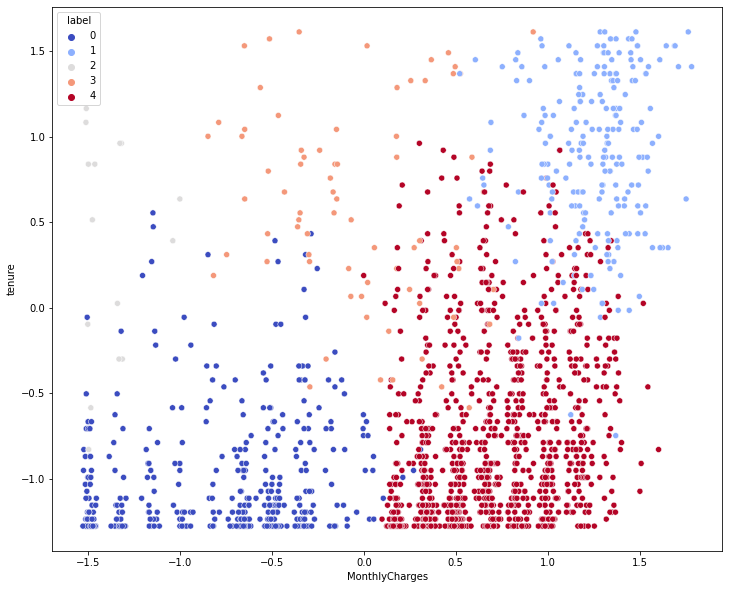

In [119]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=main_transformed[main_transformed["Churn_Yes"] == 1.0], x="MonthlyCharges", y="tenure", hue="label", palette= "coolwarm");

## Non-Churners

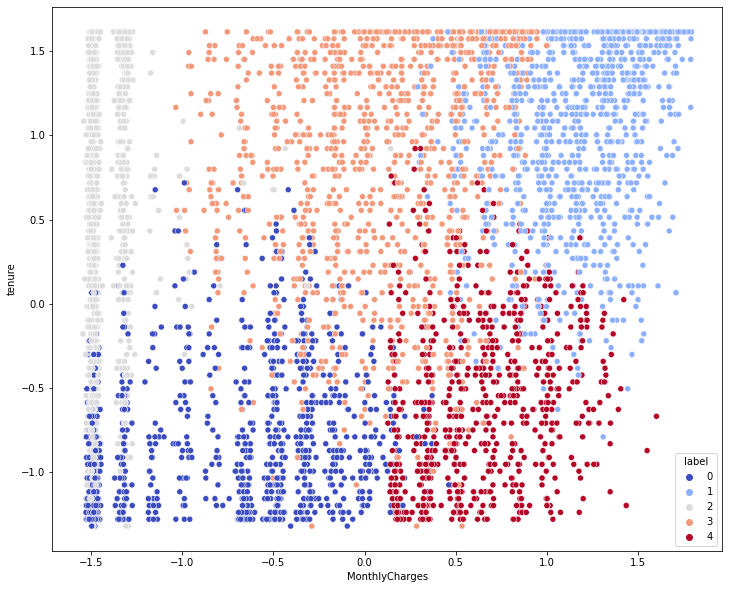

In [120]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=main_transformed[main_transformed["Churn_Yes"] == 0.0], x="MonthlyCharges", y="tenure", hue="label", palette= "coolwarm");

In [122]:
main_transformed["label"].value_counts()

4    1820
0    1692
1    1305
3    1222
2    1004
Name: label, dtype: int64

## Customer Segmentation Breakdown

**5 Customer Segments:**

💰 Group 0: Low Monthly Charge + Low Tenure

💰 Group 1: High Monthly Charge + High Tenure

💰 Group 2: Low Monthly Charge + High Tenure

💰 Group 3: Mid Monthly Charge + High Tenure

💰 Group 4: High Monthly Charge + Low Tenure